<a href="https://colab.research.google.com/github/Azariagmt/Twitter-Data-Analysis/blob/notebooks/notebooks/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
cleanTweet = pd.read_pickle('data_clean.pkl')

In [17]:
cleanTweet.head()

,polarity,subjectivity,original_text,clean_text,score
0,0.166667,0.188889,"🚨Africa is ""in the midst of a full-blown third...",africa midst fullblown third wave coronaviru h...,positive
1,0.133333,0.455556,"Dr Moeti is head of WHO in Africa, and one of ...",dr moeti head who africa one best public healt...,positive
2,0.316667,0.483333,Thank you @research2note for creating this ama...,thank creat amaz campaign amp turn social medi...,positive
3,0.086111,0.197222,"Former Pfizer VP and Virologist, Dr. Michael Y...",former pfizer vp virologist dr michael yeadon ...,positive
4,0.280000,0.620000,I think it’s important that we don’t sell COVA...,i think import dont sell covax short it still ...,positive


In [18]:
# sentiment analysis is already provided by the TextBlob library in extract_dataframe.py

# Remove rows from cleanTweet where  polarity   =0  (i.e where  score  = Neutral) and reset the frame index.
print(cleanTweet.shape)
cleanTweet = cleanTweet[cleanTweet['score'] != 'neutral']
cleanTweet.shape

(2248, 5)


(2047, 5)

In [19]:
# Construct a column  scoremap  Use the mapping {'positive':1, 'negative':0} on the  score  column
scoremaps = pd.Series([int(1) if row_val == 'positive' else int(0) for row_val in cleanTweet['score']])
cleanTweet = pd.concat([cleanTweet, scoremaps.rename("scoremap")], axis=1)
cleanTweet.head()

,polarity,subjectivity,original_text,clean_text,score,scoremap
0,0.166667,0.188889,"🚨Africa is ""in the midst of a full-blown third...",africa midst fullblown third wave coronaviru h...,positive,1.0
1,0.133333,0.455556,"Dr Moeti is head of WHO in Africa, and one of ...",dr moeti head who africa one best public healt...,positive,1.0
2,0.316667,0.483333,Thank you @research2note for creating this ama...,thank creat amaz campaign amp turn social medi...,positive,1.0
3,0.086111,0.197222,"Former Pfizer VP and Virologist, Dr. Michael Y...",former pfizer vp virologist dr michael yeadon ...,positive,1.0
4,0.280000,0.620000,I think it’s important that we don’t sell COVA...,i think import dont sell covax short it still ...,positive,1.0


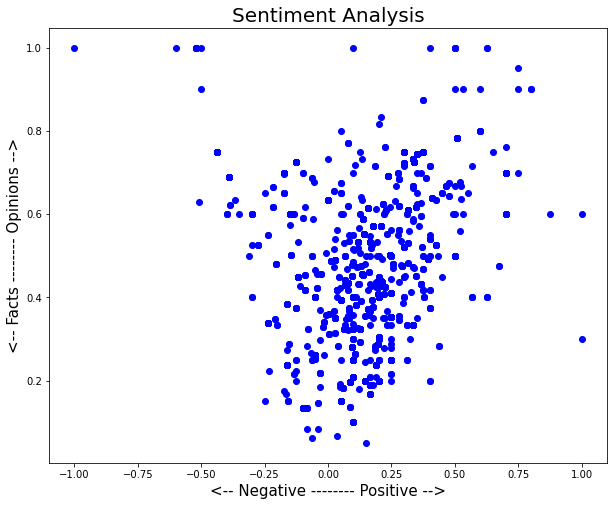

In [27]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

x = cleanTweet.polarity
y = cleanTweet.subjectivity
plt.scatter(x, y, color='blue')

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# References
https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/3-Sentiment-Analysis.ipynb